<a href="https://colab.research.google.com/github/jonkrohn/ML-foundations/blob/master/notebooks/5-probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability & Information Theory

This class, *Probability & Information Theory*, introduces the mathematical fields that enable us to quantify uncertainty as well as to make predictions despite uncertainty. These fields are essential because machine learning algorithms are both trained by imperfect data and deployed into noisy, real-world scenarios they haven’t encountered before. 

Through the measured exposition of theory paired with interactive examples, you’ll develop a working understanding of variables, probability distributions, metrics for assessing distributions, and graphical models. You’ll also learn how to use information theory to measure how much meaningful signal there is within some given data. The content covered in this class is itself foundational for several other classes in the *Machine Learning Foundations* series, especially *Intro to Statistics* and *Optimization*.

Over the course of studying this topic, you'll: 

* Develop an understanding of what’s going on beneath the hood of predictive statistical models and machine learning algorithms, including those used for deep learning. 
* Understand the appropriate variable type and probability distribution for representing a given class of data, as well as the standard techniques for assessing the relationships between distributions.
* Apply information theory to quantify the proportion of valuable signal that’s present amongst the noise of a given probability distribution. 


**Note that this Jupyter notebook is not intended to stand alone. It is the companion code to a lecture or to videos from Jon Krohn's [Machine Learning Foundations](https://github.com/jonkrohn/ML-foundations) series, which offer detail on the following:**

*Segment 1: Introduction to Probability*
* What Probability Theory Is
* A Brief History: Frequentists vs Bayesians
* Applications of Probability to Machine Learning
* Random Variables
* Discrete vs Continuous Variables
* Probability Mass and Probability Density Functions
* Expected Value
* Measures of Central Tendency: Mean, Median, and Mode
* Quantiles: Quartiles, Deciles, and Percentiles
* The Box-and-Whisker Plot
* Measures of Dispersion: Variance, Standard Deviation, and Standard Error
* Measures of Relatedness: Covariance and Correlation
* Marginal and Conditional Probabilities
* Independence and Conditional Independence

*Segment 2: Distributions in Machine Learning*
* Uniform
* Gaussian: Normal and Standard Normal
* The Central Limit Theorem
* Log-Normal
* Exponential and Laplace
* Binomial and Multinomial
* Poisson
* Mixture Distributions
* Preprocessing Data for Model Input

*Segment 3: Information Theory*
* What Information Theory Is
* Self-Information
* Nats, Bits and Shannons
* Shannon and Differential Entropy
* Kullback-Leibler Divergence
* Cross-Entropy

## Segment 1: Introduction to Probability

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

### What Probability Theory Is

Let's assume we have a fair coin, which is equally likely to come up heads (H) or tails (T).

In instances like this, where the two outcomes are equally likely, we can use probability theory to express the likelihood of a particular **event** by comparing it with the **sample space** (the set of all possible outcomes; can be denoted as $\Omega$): 

$$ P(\text{event}) = \frac{\text{no. of outcomes of event}}{\text{no. of outcomes in }\Omega} $$

If we're only flipping the coin once, then there are only two possible outcomes in the sample space $\Omega$: it will either be H or T (using set notation, we could write this as $\Omega$ = {H, T}).

Therefore: $$ P(H) = \frac{1}{2} = 0.5 $$

Equally: $$ P(T) = \frac{1}{2} = 0.5 $$

As a separate example, consider drawing a single card from a standard deck of 52 playing cards. In this case, the number of possible outcomes in the sample space $\Omega$ is 52. 

There is only one ace of spades in the deck, so the probability of drawing it is: $$ P(\text{ace of spades}) = \frac{1}{52} \approx 0.019 $$

In contrast there are four aces, so the probability of drawing an ace is: $$ P(\text{ace}) = \frac{4}{52} \approx 0.077 $$

Some additional examples: 
$$ P(\text{spade}) = \frac{13}{52} = 0.25 $$
$$ P(\text{ace OR spade}) = \frac{16}{52} \approx 0.307 $$
$$ P(\text{card}) = \frac{52}{52} = 1 $$
$$ P(\text{turnip}) = \frac{0}{52} = 0 $$

#### Multiple independent observations

Let's return to coin flipping to illustrate situations where we have an event consisting of multiple independent observations. For example, the probability of throwing two consecutive heads is: $$ P(\text{HH}) = \frac{1}{4} = 0.25 $$ ...because there is one HH event in the sample set of four possible events ($\Omega$ = {HH, HT, TH, TT}).

Likewise, the probability of throwing *three* consecutive heads is: $$ P(\text{HHH}) = \frac{1}{8} = 0.125 $$ ...because there is one HHH event in the sample set of eight possible events ($\Omega$ = {HHH, HHT, HTH, THH, HTT, THT, TTH, TTT}).

As final examples, the probability of throwing exactly two heads in three tosses is $ P = \frac{3}{8} = 0.375 $ while the probability of throwing at least two heads in three tosses is $ P = \frac{4}{8} = 0.5 $.

#### Combining probabilities

In order to combine probabilities, we can multiply them. So the probability of throwing five consecutive heads, for example, is the product of probabilities we've already calculated: $$ P(\text{HHHHH}) = P(\text{HH}) \times P(\text{HHH}) = \frac{1}{4} \times \frac{1}{8} = \frac{1}{32} \approx 0.031 $$

#### Combinatorics

*Combinatorics* is a field of mathematics devoted to counting that can be helpful to studying probabilities. We can use **factorials** (e.g., $4! = 4 \times 3 \times 2 \times 1 = 24$), which feature prominently in combinatorics, to calculate probabilities instead of painstakingly determining all of the members of the sample space $\Omega$ and counting subsets within $\Omega$. 

More specifically, we can calculate the number of outcomes of an event using the "number of combinations" equation: $$ {n \choose k} = \frac{n!}{k!(n - k)!} $$

The left-hand side of the equation is read "$n$ choose $k$" and is most quickly understood via an example: If we have three coin flips, $n = 3$, and if we're interested in the number of ways to get two head flips (or two tail flips, for that matter), $k = 2$. We would read this as "3 choose 2" and calculate it as:
$$ {n \choose k} = {3 \choose 2} = \frac{3!}{2!(3 - 2)!} = \frac{3!}{(2!)(1!)} = \frac{3 \times 2 \times 1}{(2 \times 1)(1)} = \frac{6}{(2)(1)} = \frac{6}{2} = 3 $$

This provide us with the numerator for event-probability equation from above: $$ P(\text{event}) = \frac{\text{no. of outcomes of event}}{\text{no. of outcomes in }\Omega} $$

In the case of coin-flipping (or any binary process with equally probable outcomes), the denominator can be calculated with $2^n$ (where $n$ is again the number of coin flips), so: $$ \frac{\text{no. of outcomes of event}}{\text{no. of outcomes in }\Omega} = \frac{3}{2^n} = \frac{3}{2^3} = \frac{3}{8} = 0.375 $$

**Exercises**:

1. What is the probability of drawing the ace of spades twice in a row? (Assume that any card drawn on the first draw will be put back in the deck before the second draw.)
2. You draw a card from a deck of cards. After replacing the drawn card back in the deck and shuffling thoroughly, what is the probability of drawing the same card again? 
3. Use $n \choose k$ to calculate the probability of throwing three heads in five coin tosses.
4. Create a Python method that solves exercise 3 and incorporates the $n \choose k$ formula $\frac{n!}{k!(n - k)!}$. With the method in hand, calculate the probability of -- in five tosses -- throwing each of zero, one, two, three, four, and five heads.

**Spoiler alert**: Solutions are below so scroll carefully...

**Solutions**:

1. $$ P(\text{ace of spades}) \times P(\text{ace of spades}) = \left(\frac{1}{52}\right)^2 = \frac{1}{2704} = 0.00037 = 0.037\% $$

2. $$ P(\text{any card}) = \frac{52}{52} = 1 $$
$$ P(\text{same card as first draw}) = \frac{1}{52} \approx 0.019 $$
$$ P(\text{any card})P(\text{same card as first draw}) = (1)(\frac{1}{52}) = \frac{1}{52} \approx 0.019$$

3. $$ {n \choose k} = {5 \choose 3} = \frac{5!}{3!(5 - 3)!} = \frac{5!}{(3!)(2!)} = \frac{5 \times 4 \times 3 \times 2 \times 1}{(3 \times 2 \times 1)(2 \times 1)} = \frac{120}{(6)(2)} = \frac{120}{12} = 10 $$

$$P = \frac{10}{2^n} = \frac{10}{2^5} = \frac{10}{32} = 0.3125 $$

In [2]:
from math import factorial

In [3]:
def coinflip_prob(n, k):
    n_choose_k = factorial(n)/(factorial(k)*factorial(n-k))
    return n_choose_k/2**n

In [4]:
coinflip_prob(5, 3)

0.3125

In [5]:
[coinflip_prob(5, h) for h in range(6)]

[0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125]

#### The Law of Large Numbers

While a fair coin should land heads up 50% of the time, as we've seen above, with small sample sizes, there is a non-trivial possibility that in a given experiment we could flip heads on all of the tosses. For example, we've calculated that there's a 3.1% chance that we'll get heads on every toss in a small five-toss experiment. 

The **law of large numbers** states that the more experiments we run, the closer we will tend to get to the expected probability. 

Let's run some code to examine this in practice. To start, we'll create a vector of exponentially increasing $n$umbers of coin tosses per experiment: 

In [6]:
ns = np.array([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]) 

In [7]:
np.random.seed(42) # for reproducibility

We will discuss the `binomial()` method in more detail in *Segment 2*. For now it suffices to think of its two arguments as *number of coin flips in experiment* and *probability of heads*, while it returns the number of flips that are heads in the experiment.

In [8]:
np.random.binomial(1, 0.5)

0

In [9]:
heads_count = [np.random.binomial(n, 0.5) for n in ns]
heads_count

[2, 3, 4, 6, 13, 27, 54, 136, 258, 509, 1038, 2094]

In [10]:
proportion_heads = heads_count/ns
proportion_heads

array([1.        , 0.75      , 0.5       , 0.375     , 0.40625   ,
       0.421875  , 0.421875  , 0.53125   , 0.50390625, 0.49707031,
       0.50683594, 0.51123047])

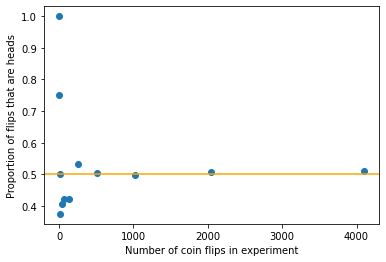

In [11]:
fig, ax = plt.subplots()
plt.xlabel('Number of coin flips in experiment')
plt.ylabel('Proportion of flips that are heads')
plt.axhline(0.5, color='orange')
_ = ax.scatter(ns, proportion_heads)

It is important at this juncture to address the **gambler's fallacy**. It is a common misconception that the law of large numbers dictates that if, say, five heads have been flipped in a row, then the probability of tails is higher on the sixth flip. In fact, probability theory holds that each coin flip is completely independent of all others. Thus, every single flip of a fair coin has a 50% chance of being heads, no matter what happened on preceding flips.

(To capitalize on this misunderstanding, roulette tables at casinos often have prominent displays tracking the history of red versus black even though there's a 47.4% chance of each on every spin of the roulette wheel no matter what happened on preceding spins. Gamblers will note, say, five reds in a row at a given table and flock to it to bet on black.) 

#### Statistics

The field of statistics applies probability theory to make inferences with a quantifiable degree of confidence. For example, let's say we ran the five-coin-flip experiment 1000 times with a fair coin: 

In [12]:
n_experiments = 100000000
heads_count = np.random.binomial(5, 0.5, n_experiments)

We can plot the results of our experiment to create a **probability distribution**: 

In [13]:
heads, event_count = np.unique(heads_count, return_counts=True)

In [14]:
heads

array([0, 1, 2, 3, 4, 5])

In [15]:
event_count

array([ 3126843, 15621370, 31256931, 31252309, 15618366,  3124181])

In [16]:
event_proba = event_count/n_experiments
event_proba

array([0.03126843, 0.1562137 , 0.31256931, 0.31252309, 0.15618366,
       0.03124181])

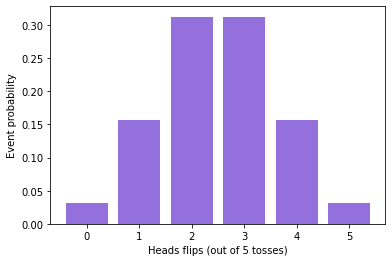

In [17]:
plt.bar(heads, event_proba, color='mediumpurple')
plt.xlabel('Heads flips (out of 5 tosses)')
_ = plt.ylabel('Event probability')

Let's say we'd like to now test a coin as to whether it's fair or not. We flip it five times and all five times it comes up heads. Does this imply it's not a fair coin? Statistics arms us with tools to use the probability distribution above to answer this question with a particular degree of confidence. 

**Return to slides here.**

### Expected Value

In [18]:
P = [coinflip_prob(5, x) for x in range(6)]
P

[0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125]

From the slides:
$$ \mathbb{E} = \sum_x xP(x) $$

In [19]:
E = sum([P[x]*x for x in range(6)])
E

2.5

**Exercises**:

1. Assuming heads = 1 and tails = 0, what’s the expected value of the toss of a fair coin? 
2. ...and of two tosses of a fair coin? 
3. You are one of a thousand people to purchase a lottery ticket. The ticket costs $10 and pays out $5000. What value should you expect from this transaction? 


**Spoiler Alert**: Solutions below

**Solutions**:

1. (½)0 + (½)1 = 0 + ½ = ½ 
2. (¼)0 + (½)1 + (¼)2 = 0 + ½ + ½ = 1 

3. 
(1/1000)(\\$5000-\\$10) + (999/1000)(-\\$10) \
= (1/1000)(\\$4990) + (999/1000)(-\\$10) \
= \\$4.99 + (\\$-9.99) \
= -\\$5


### Measures of Central Tendency

Measures of central tendency provide a summary statistic on the center of a given distribution, a.k.a., the "average" value of the distribution.

#### Mean

The most common measure of central tendency, synonomous with the term "average", is the **mean**, often symbolized with $\mu$ (population) or $\bar{x}$ (sample):

$$ \bar{x} = \frac{\sum_{i=1}^n x_i}{n} $$

Expected value is in fact the long-term *mean* of some function (i.e., $\mu = \mathbb{E}$). Let's calculate how close the sample mean, $\bar{x}$, of our five-coin-flip experiments comes to the expected value, $\mathbb{E} = 2.5$.

In [20]:
len(heads_count)

100000000

In [21]:
heads_count[0:20]

array([2, 2, 2, 3, 2, 3, 3, 1, 3, 1, 1, 4, 4, 3, 2, 1, 3, 2, 1, 2])

In [22]:
sum(heads_count)/len(heads_count)

2.49986528

Unsurprisingly, NumPy comes with a built-in function:

In [23]:
np.mean(heads_count)

2.49986528

In [24]:
heads_count.mean() # fun!

2.49986528

Pretty close! The law of large numbers implies that as we increase the number of experiments (e.g., to a million -- you're welcome to try it), we'll converge on $\mathbb{E}=2.5$.

#### Median

The second most common measure of central tendency is the **median**, the midpoint value in the distribution: 

In [25]:
heads_count.sort()

In [26]:
heads_count[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [27]:
heads_count[-20:]

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [28]:
len(heads_count)

100000000

With an odd number of values in a distribution, we consider the single midpoint to be the median, e.g., the midpoint of the sorted array `[2, 4, 6, 9, 10]` is six.

With an even number, we take the mean of the two values that straddle the midpoint: 

In [29]:
heads_count[499]

0

In [30]:
heads_count[500]

0

...which in this case is obviously three: 

In [31]:
(3+3)/2

3.0

Built-in method:

In [32]:
np.median(heads_count)

2.0

#### Mode

The **mode** is the final common measure of central tendency. It is simply the value in the distribution that occurs most frequently.

As is clear in the most recently output chart, in the case of our five-coin-toss experiment, the mode is three. 

Method available in the SciPy `stats` module:

In [33]:
st.mode(heads_count)

ModeResult(mode=array([2]), count=array([31256931]))

In [34]:
st.mode(heads_count)[0][0]

2

With small sample sizes, the mean typically provides the most accurate measure of central tendency.

With larger sample sizes, the mean, median, and mode will tend to coincide, as long as the distribution isn't skewed: 

In [35]:
x = st.skewnorm.rvs(0, size=1000)
x # first argument is "skewness"; 0 has no skew

array([-1.49351184e+00,  3.24385106e-02, -1.35949706e-01, -6.64342507e-02,
        6.01035596e-01, -6.62810505e-01,  9.94101268e-01,  1.99752108e-03,
       -9.31670234e-01,  1.88005525e-01,  3.09893483e-01,  8.00609209e-01,
        3.84321346e-01, -2.02137200e-02, -4.40625386e-01, -8.32510119e-01,
       -1.14710427e+00,  8.02909432e-01, -1.88628922e+00,  1.21462336e+00,
        1.84269514e+00, -8.93392027e-01, -1.48366832e+00,  6.90199452e-01,
       -1.23307787e+00,  1.43736069e+00,  4.99535278e-01, -2.91910681e-01,
       -7.58313544e-01, -3.13164709e-02,  9.69971626e-02, -1.44681692e+00,
        5.98758469e-01,  1.35017280e+00, -3.64446768e-01, -8.92557213e-01,
        1.45508103e+00, -2.02590038e+00,  3.39383744e-01,  6.48672531e-01,
        7.53770194e-01,  1.10676768e+00, -1.45122604e+00,  3.22714452e+00,
        8.95325761e-02,  5.55445272e-01, -6.57983174e-01, -1.05345320e+00,
        7.69684933e-01,  5.54170844e-01,  4.83885885e-01, -4.21193097e-02,
        1.88946225e-01, -

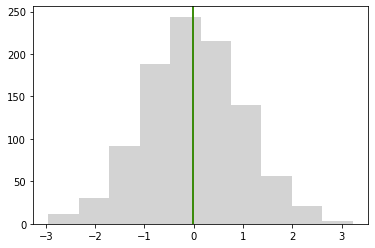

In [36]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')
# Note: Mode typically only applies to PMFs; this is a PDF

Skewed distributions, in contrast, drag the mean away from the center and toward the tail: 

In [37]:
x = st.skewnorm.rvs(10, size=1000) 

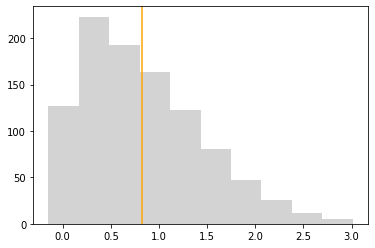

In [38]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
_ = plt.hist(x, color = 'lightgray')

The mode is least impacted by skew, but is only applicable to discrete distributions. For continuous distributions with skew (e.g., salary data), median is typically the choice measure of central tendency:

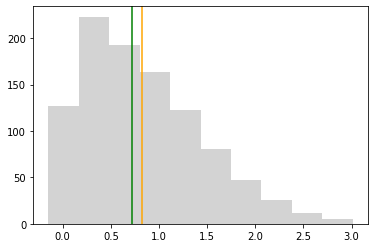

In [39]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')

### Quantiles

The median, which divides a distribution in two at its midpoint, is the most well-known example of a quantile:

In [40]:
np.median(x)

0.7150499620469634

In [41]:
np.quantile(x, 0.5)

0.7150499620469634

Generally speaking, quantiles divide up distributions and the most common are:

* Percentiles, 
* Quartiles, and
* Deciles.

**Percentiles** divide the distribution at any point out of one hundred ("pour cent" is French for "out of a hundred"). For example, if we'd like to identify the threshold for the top 5% of a distribution, we'd cut it at the 95th percentile. Or, for the top 1%, we'd cut at the 99th percentile.

In [42]:
p = np.percentile(x, [95, 99])
p

array([1.97400212, 2.48920099])

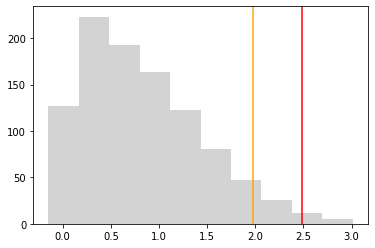

In [43]:
fig, ax = plt.subplots()
plt.axvline(x = p[0], color='orange')
plt.axvline(x = p[1], color='red')
_ = plt.hist(x, color = 'lightgray')

Note that the Numpy `quantile()` method is identical to the `percentile()` method except we pass proportions (ranging from zero to one) into the former and percentages (ranging from zero to 100) into the latter: 

In [44]:
np.quantile(x, [.95, .99])

array([1.97400212, 2.48920099])

**Quartiles**, as their name suggests, are quantiles that divide a distribution into quarters by splitting the distribution at the 25th percentile, the median (a.k.a. the 50th percentile), and the 75th percentile: 

In [45]:
q = np.percentile(x, [25, 50, 75, 95, 100])
q

array([0.35322025, 0.71504996, 1.21455617, 1.97400212, 3.01241614])

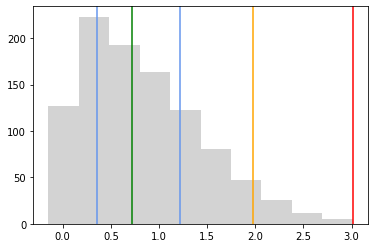

In [46]:
fig, ax = plt.subplots()
plt.axvline(x = q[0], color='cornflowerblue')
plt.axvline(x = q[1], color='green')
plt.axvline(x = q[2], color='cornflowerblue')
plt.axvline(x = q[3], color='orange')
plt.axvline(x = q[4], color='red')
_ = plt.hist(x, color = 'lightgray')

Finally, **deciles** (from Latin *decimus*, meaning "tenth") divide a distribution into ten evenly-sized segments: 

In [47]:
[i for i in range(10, 100, 10)]

[10, 20, 30, 40, 50, 60, 70, 80, 90]

In [48]:
d = np.percentile(x, range(10, 100, 10))
d

array([0.11857142, 0.28153945, 0.42521071, 0.55409046, 0.71504996,
       0.90537967, 1.09715918, 1.33450591, 1.70106779])

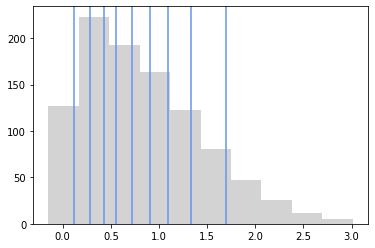

In [49]:
fig, ax = plt.subplots()
[plt.axvline(x = d_i, color='cornflowerblue') for d_i in d]
_ = plt.hist(x, color = 'lightgray')

As examples, we can refer to the bottom 10% as the bottom decile or the first decile, while the top 10% is the top decile or tenth decile.

### The Box-and-Whisker Plot

In [50]:
sns.set(style='whitegrid')

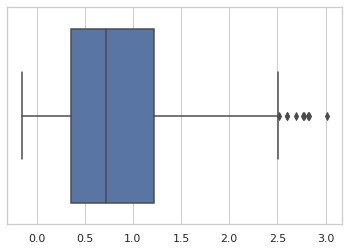

In [51]:
_ = sns.boxplot(x=x)

Box edges and median are determined by quartiles:

In [52]:
q

array([0.35322025, 0.71504996, 1.21455617, 1.97400212, 3.01241614])

Box edges define the **inter-quartile range** (IQR): 

In [53]:
r = 1.194 - 0.325
r

0.869

Whisker lengths are determined by furthest data points within $1.5 \times \text{IQR}$ of the box edges.

In this case, the lower whisker could stretch as far down (to the left in the plot) as:

In [54]:
0.325 - 1.5*r

-0.9785000000000001

The lowest value is inside of that so the whisker is plotted where that lowest value is: 

In [55]:
np.min(x)

-0.14812123882018174

The upper whisker could stretch as far up (to the right in the plot) as: 

In [56]:
1.194 + 1.5*r

2.4975

There are several (eleven) values beyond this threshold in the distribution. These values are considered **outliers** and are plotted as individual points:

In [57]:
x.sort()

In [58]:
x[-15:]

array([2.4402303 , 2.44671553, 2.46502887, 2.47320689, 2.48907907,
       2.50127113, 2.51202146, 2.59499397, 2.60113704, 2.69094987,
       2.76950169, 2.77213837, 2.81903223, 2.8235988 , 3.01241614])

The twelth-highest value, 2.435, is the largest within the upper whisker's maximum reach and so the upper whisker is plotted there. 

Useful for examining distributions on their own, box-and-whisker plots are especially helpful for comparing distributions:

In [59]:
iris = sns.load_dataset('iris')
print(type(iris))
iris

<class 'pandas.core.frame.DataFrame'>


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


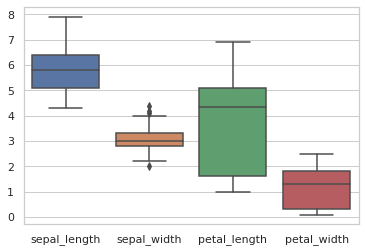

In [60]:
_ = sns.boxplot(data=iris)

In [61]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


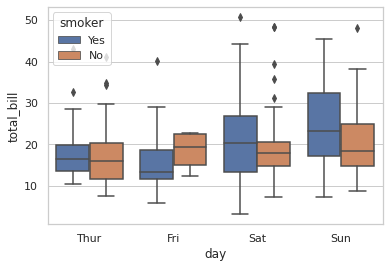

In [62]:
_ = sns.boxplot(x='day', y='total_bill', hue='smoker', data=tips)

### Measures of Dispersion

IQR is a relatively rare measure of the dispersion of values around the center of a distribution. The most widely-used are: 

* Variance,
* Standard deviation, and
* Standard error. 

**Variance** (denoted with $\sigma^2$) can be written using expected-value notation, but it's easier to understand without it: 
$$ \sigma^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n} $$

(The astute follower of the *Machine Learning Foundations* series may notice that this formula is the same as mean-squared-error cost, except $x_i$ is being compared to the mean $\mu$ instead of a predicted value $\hat{x}_i$.)

(Technically speaking, we should divide by $n$-1 with a sample of data, but with the large datasets typical of machine learning, it's a negligible difference. If $n$ were equal to a small number like 8 then it would matter.)

(Also technically speaking, the variance of a sample is typically denoted with $s^2$ as opposed to the Greek $\sigma^2$, akin to how $\bar{x}$ denotes the mean of a sample while the Greek $\mu$ is reserved for population mean.)

As an example let's calculate the variance of the PDF `x` from earlier: 

In [63]:
xbar = np.mean(x)
xbar

0.8285775359757375

In [64]:
squared_differences = [(x_i - xbar)**2 for x_i in x]

In [65]:
squared_differences[0:10]

[0.9539404966878499,
 0.9506790911790766,
 0.942942857127218,
 0.9333447886607278,
 0.9173162212515705,
 0.8984359347281907,
 0.8648774089035169,
 0.8264404622295904,
 0.8252439636954871,
 0.8164393500851668]

In [66]:
sigma_squared = sum(squared_differences)/len(x)
sigma_squared

0.3696273311505307

Of course there's a built-in NumPy method: 

In [67]:
np.var(x)

0.36962733115053104

#### Standard Deviation

A straightforward derivative of variance is **standard deviation** (denoted with $\sigma$), which is convenient because its units are on the same scale as the values in the distribution: 
$$ \sigma = \sqrt{\sigma^2} $$

In [68]:
sigma = sigma_squared**(1/2)
sigma

0.6079698439483086

In [69]:
np.std(x)

0.6079698439483089

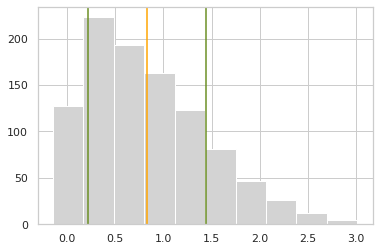

In [70]:
fig, ax = plt.subplots()
plt.axvline(x = xbar, color='orange')
plt.axvline(x = xbar+sigma, color='olivedrab')
plt.axvline(x = xbar-sigma, color='olivedrab')
_ = plt.hist(x, color = 'lightgray')

#### Standard Error

A further derivation of standard deviation is **standard error**, which is denoted with $\sigma_\bar{x}$:
$$ \sigma_\bar{x} = \frac{\sigma}{\sqrt{n}} $$

In [71]:
sigma/(len(x))**(1/2)

0.01922569455573792

In [72]:
st.sem(x) # defaults to 1 degree of freedom (n-1), which can be ignored with the larger data sets of ML

0.01923531461866455

In [73]:
st.sem(x, ddof=0) # 0 degrees of freedom (n)

0.01922569455573793

Standard error enables us to compare whether the means of two distributions differ *significantly*, a focus of *Intro to Stats*.

### Measures of Relatedness

If we have two vectors of the same length, $x$ and $y$, where each element of $x$ is paired with the corresponding element of $y$, **covariance** provides a measure of how related the variables are to each other:
$$ \text{cov}(x, y) = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }{n} $$

In [74]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [75]:
x = iris.sepal_length
y = iris.petal_length

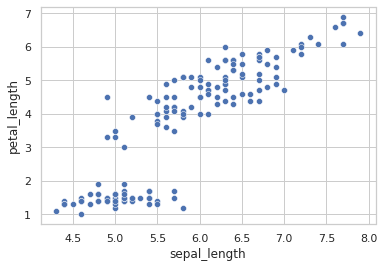

In [76]:
_ = sns.scatterplot(x=x, y=y)

In [77]:
n = len(x)

In [78]:
xbar = sum(x)/n
ybar = sum(y)/n

In [79]:
product = [(x[i]-xbar)*(y[i]-ybar) for i in range(n)]

In [80]:
cov = sum(product)/n
cov

1.2658199999999995

The NumPy `cov()` method returns a **covariance matrix**, which is a $2 \times 2$ matrix because $x$ and $y$ together describe a two-dimensional space: 

In [81]:
np.cov(x, y, ddof=0) # again, defaults to ddof=1

array([[0.68112222, 1.26582   ],
       [1.26582   , 3.09550267]])

The diagonal elements of the covariance matrix represent the variance of $x$ and $y$, respectively: 

In [82]:
np.var(x)

0.6811222222222223

In [83]:
np.var(y)

3.0955026666666665

If $x$ and $y$ are inversely related, their covariance is negative. The less related they are, the closer their covariance is to zero: 

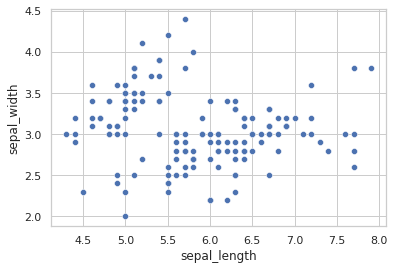

In [84]:
_ = sns.scatterplot(x=iris.sepal_length, y=iris.sepal_width)

In [85]:
np.cov(iris.sepal_length, iris.sepal_width, ddof=0)

array([[ 0.68112222, -0.04215111],
       [-0.04215111,  0.18871289]])

#### Correlation

A drawback of covariance is that it confounds the relative scale of two variables with a measure of the variables' relatedness. **Correlation** builds on covariance and overcomes this drawback via rescaling, thereby measuring relatedness exclusively. Correlation is much more common because of this difference. 

The correlation coefficient (developed by Karl Pearson in the 20th c. though known in the 19th c.) is often denoted with $r$ or $\rho$ and is defined by: 
$$ \rho_{x,y} = \frac{\text{cov}(x,y)}{\sigma_x \sigma_y} $$

In [86]:
cov = -0.04215111
sigma_sq_x = 0.68112222
sigma_sq_y = 0.18871289

In [87]:
sigma_x = sigma_sq_x**(1/2)
sigma_y = sigma_sq_y**(1/2)

In [88]:
cov / (sigma_x * sigma_y)

-0.11756978087951572

In [89]:
st.pearsonr(iris.sepal_length, iris.sepal_width)

(-0.11756978413300206, 0.15189826071144766)

The second value output of `pearsonr` is a measure of statistical significance, which we'll detail in *Intro to Stats*. 

$\rho$ has a range of -1 to 1, with values closer to zero indicating less correlation: 

In [90]:
st.pearsonr(iris.sepal_length, iris.sepal_width)[0]

-0.11756978413300206

The closer $\rho$ is to 1 or -1, the stronger the positive or negative correlation, respectively: 

In [91]:
st.pearsonr(iris.sepal_length, iris.petal_length)[0]

0.8717537758865831

In [92]:
st.pearsonr(iris.petal_length, iris.petal_width)

(0.962865431402796, 4.6750039073285846e-86)

N.B.: Covariance and correlation only account for linear relationships. Two variables could be non-linearly related to each other and these metrics could come out as zero.

**Return to slides here.**

## Segment 2: Distributions in Machine Learning

### Uniform

The uniform distribution is about as straightforward as they come. It has constant probabilities across the entire range of values in its domain: 

In [93]:
u = np.random.uniform(size=10000)

In [94]:
sns.set_style('ticks')

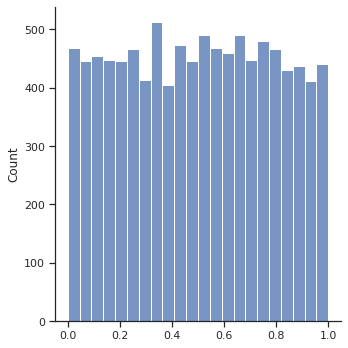

In [95]:
_ = sns.displot(u)

Real-world examples include: 

* Dice rolling (PMF)
* Card drawing (PMF)
* Model hyperparameters
* Emission of radioactive particles
* Economic demand 
* Analog-to-digital signal quantization errors

### Gaussian

Carl Friedrich Gauss (early 19th c. German mathematician and scientist) is the namesake of over a hundred concepts across mathematics, physics, and astronomy. One of those concepts is the Gaussian distribution, also known as the "bell curve" (though several distributions are bell-shaped) or **normal distribution**: 

In [96]:
x = np.random.normal(size=10000)

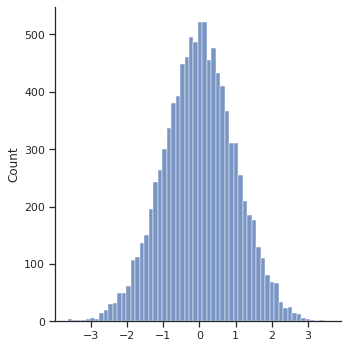

In [97]:
_ = sns.displot(x)

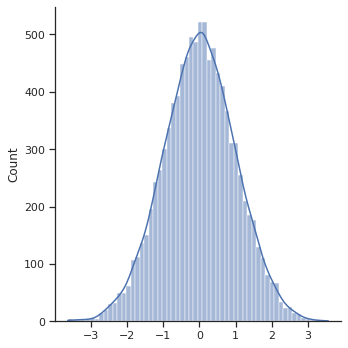

In [98]:
_ = sns.displot(x, kde=True)

When the normal distribution has a mean ($\mu$) of zero and standard deviation ($\sigma$) of one, as it does by default with the NumPy `normal()` method...

In [99]:
np.mean(x)

0.006305210896740086

In [100]:
np.std(x)

0.994590237904478

...it is a **standard normal distribution** (a.k.a., standard Gaussian distribution). Normal distributions can be denoted with the *math calligraphy* font as $\mathcal{N}(\mu, \sigma^2)$, thus the standard normal distribution can be denoted as $\mathcal{N}(0, 1)$. 

(N.B.: $\sigma^2 = \sigma$ in this case because $1^2 = 1$.)

Normal distributions are by far the most common distribution in statistics and machine learning. They are typically the default option, particularly if you have limited information about the random process you're modeling, because: 

1. Normal distributions assume the greatest possible uncertainty about the random variable they represent (relative to any other distribution of equivalent variance). Details of this are beyond the scope of this tutorial. 
2. Simple and very complex random processes alike are, under all common conditions, normally distributed when we sample values from the process. Since we sample data for statistical and machine learning models alike, this so-called **central limit theorem** (covered next) is a critically important concept. 

Real-world examples include: 

* Probability of heads across *n* tosses (PMF; $n = 5$ earlier, $n = 100$ below)
* Sum of di(c)e rolls (PMF)
* Height of adult women
* Height of adult men
* Education test scores, e.g., SAT

In [101]:
n_experiments = 10000
heads_count = [np.random.binomial(100, 0.5) for i in range (n_experiments)]
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments

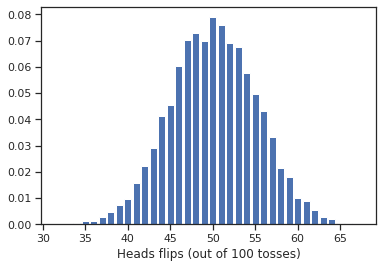

In [102]:
plt.bar(heads, event_proba)
_ = plt.xlabel('Heads flips (out of 100 tosses)')

### The Central Limit Theorem

To develop a functional understanding of the CLT, let's sample some values from our normal distribution:

In [103]:
x_sample = np.random.choice(x, size=10, replace=False)
x_sample

array([-0.74112864,  0.20110686,  0.86965934, -1.08079373,  0.85088724,
        1.47054935, -0.15494123,  0.74858869, -0.36110419, -0.20814296])

The mean of a sample isn't always going to be close to zero with such a small sample:

In [104]:
np.mean(x_sample)

0.15946807377012712

Let's define a function for generating **sampling distributions** of the mean of a given input distribution:

In [105]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

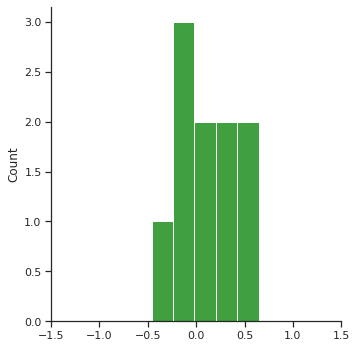

In [106]:
sns.displot(sample_mean_calculator(x, 10, 10), color='green')
_ = plt.xlim(-1.5, 1.5)

The more samples we take, the more likely that the sampling distribution of the means will be normally distributed: 

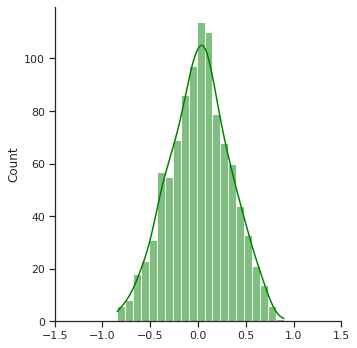

In [107]:
sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

The larger the sample, the tighter the sample means will tend to be around the population mean:

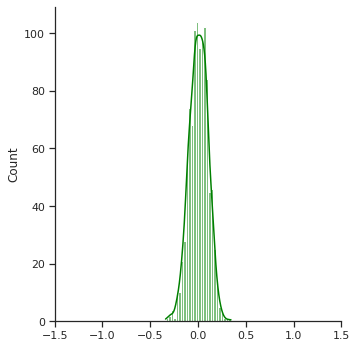

In [108]:
sns.displot(sample_mean_calculator(x, 100, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

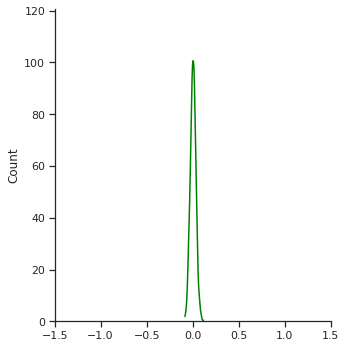

In [109]:
sns.displot(sample_mean_calculator(x, 1000, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

#### Sampling from a skewed distribution

In [110]:
s = st.skewnorm.rvs(10, size=10000)

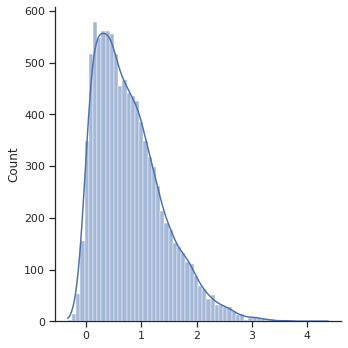

In [111]:
_ = sns.displot(s, kde=True)

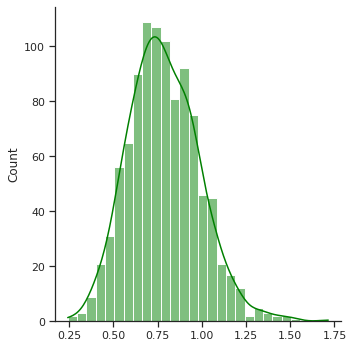

In [112]:
_ = sns.displot(sample_mean_calculator(s, 10, 1000), color='green', kde=True)

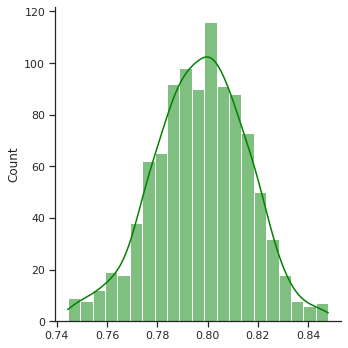

In [113]:
_ = sns.displot(sample_mean_calculator(s, 1000, 1000), color='green', kde=True)

#### Sampling from a multimodal distribution

In [114]:
m = np.concatenate((np.random.normal(size=5000), np.random.normal(loc = 4.0, size=5000)))

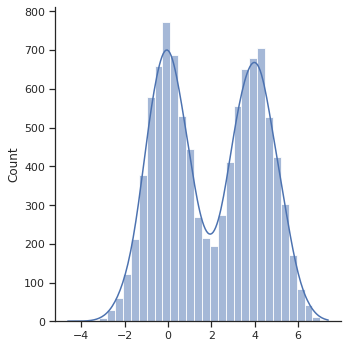

In [115]:
_ = sns.displot(m, kde=True)

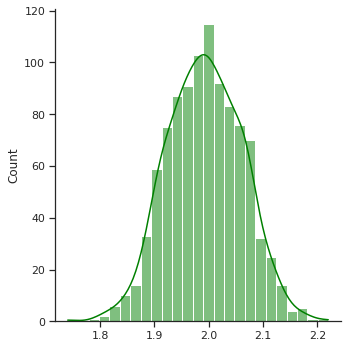

In [116]:
_ = sns.displot(sample_mean_calculator(m, 1000, 1000), color='green', kde=True)

#### Sampling from uniform

Even sampling from the highly non-normal uniform distribution, the sampling distribution comes out normal: 

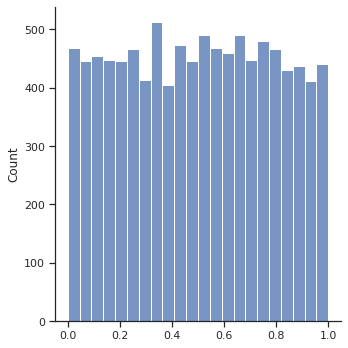

In [117]:
_ = sns.displot(u)

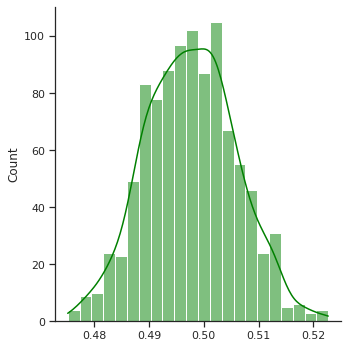

In [118]:
_ = sns.displot(sample_mean_calculator(u, 1000, 1000), color='green', kde=True)

Therefore, with large enough sample sizes, we can assume the sampling distribution of the means will be normally distributed, allowing us to apply statistical and ML models that are configured for normally distributed noise, which is often the default assumption.

As an example, the "*t*-test" (covered in *Intro to Stats*) allows us to infer whether two samples come from different populations (say, an experimental group that receives a treatment and a control group that receives a placebo). Thanks to the CLT, we can use this test even if we have no idea what the underlying distributions of the populations being tested are, which may be the case more frequently than not. 

(Despite being associated with such a key concept as the CLT, the name "normal distribution" wasn't originally intended to imply that other distributions are "abnormal". It's a historical quirk related to Gauss describing orthogonal (technically a.k.a. "normal") equations associated with applied uses of the distribution.)

(Finally, you may wonder what the purpose of sampling means is! Well, when we gather data from the real world we are nearly always sampling a subset of all the available data produced by a given random process. And, once we've collected a sample of data, the aspect of it we're often most interested in above all else is its mean.)

### Log-Normal Distribution

The natural logarithm of the **log-normal** distribution is normally distributed: 

In [119]:
x = np.random.lognormal(size=10000) # defaults to standard normal mu=0, sigma=1

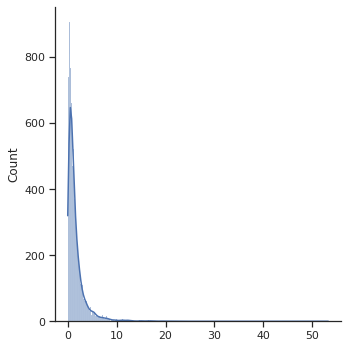

In [120]:
_ = sns.displot(x, kde=True)

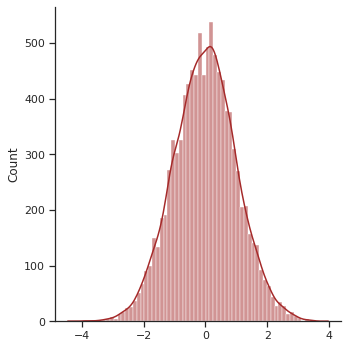

In [121]:
_ = sns.displot(np.log(x), color='brown', kde=True)

Real-world examples: 

* Income
* Length of comments in online forums
* Duration of chess games or Rubik's Cube solves
* Size of publicly-available video files 
* Number of hospitalized cases in an epidemic where public interventions are involved

### Exponential Distribution

Relatively squished up against zero and then decreases exponentially toward higher values. Log-normal distribution, in contrast, could take negative values and both increases and decreases.

In [122]:
x = np.random.exponential(scale=4, size=10000) # "scale" parameter defaults to one

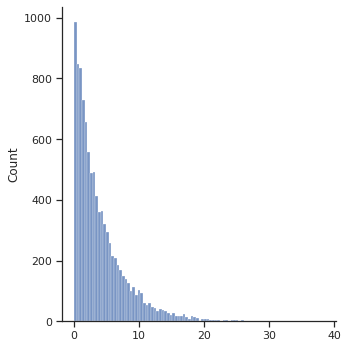

In [123]:
_ = sns.displot(x)

Its logarithm has a skewed distribution: 

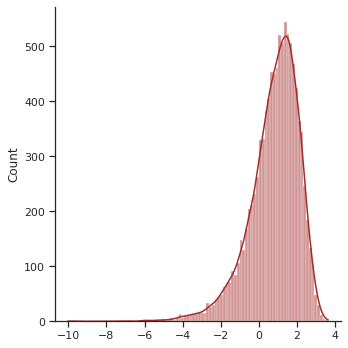

In [124]:
_ = sns.displot(np.log(x), color='brown', kde=True)

Real-world examples: 

* Time between requests to access Wikipedia pages
* Used frequently in deep learning

### Laplace Distribution

Named after Pierre-Simon Laplace, whom we mentioned (and pictured) earlier as a key figure in the development of Bayesian statistics.

In [125]:
x = np.random.laplace(size=10000)

Alternatively referred to as the "double exponential distribution":

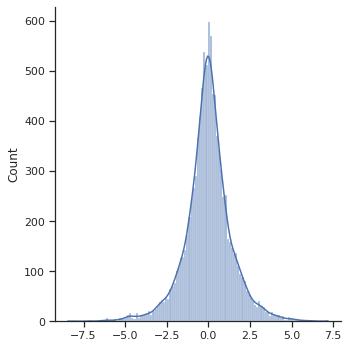

In [126]:
_ = sns.displot(x, kde=True)

In addition to the scale parameter of the exponential function, it has a location parameter that allows it to be centered on any value: 

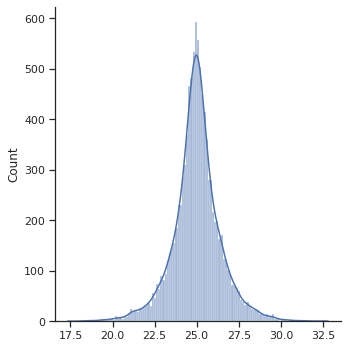

In [127]:
_ = sns.displot(np.random.laplace(loc=25, size=10000), kde=True)

Real-world examples: 

* Extreme weather events, e.g., maximum rainfall in a day
* Many machine learning applications; wherever an acute peak of probability is desired

### Binomial Distribution

All distributions so far have been for continuous variables (PDFs). This one is discrete (PMF). 

We've already been using it for coin flips; it's used for binary (0 or 1) outcome. 

Its parameters are: 

* *n*: number of trials
* *p*: probability of outcome of 1
* *size*: number of experiments with *n* trials each

In [128]:
n = 5
n_experiments = 1000

#### Fair coin (p = 0.5)

In [129]:
heads_count = np.random.binomial(n, 0.5, n_experiments)
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments

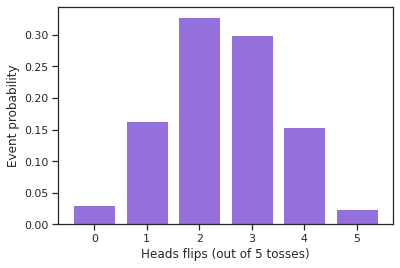

In [130]:
plt.bar(heads, event_proba, color='mediumpurple')
plt.xlabel('Heads flips (out of 5 tosses)')
_ = plt.ylabel('Event probability')

#### Weighted coin (p = 0.8)

In [131]:
heads_count = np.random.binomial(n, 0.8, n_experiments)
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments

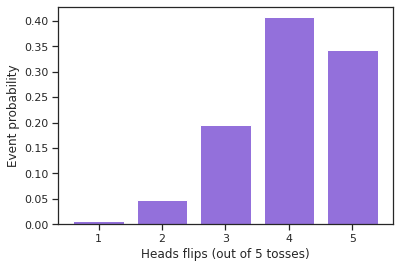

In [132]:
plt.bar(heads, event_proba, color='mediumpurple')
plt.xlabel('Heads flips (out of 5 tosses)')
_ = plt.ylabel('Event probability')

Technically, binomial distributions are created by sampling $n>1$ "Bernoulli trials". The **Bernoulli** distribution is equivalent to the binomial distribution where $n=1$: 

In [133]:
np.random.binomial(1, 0.5)

1

Real-world examples:

* Making it to work on time
* Candidate being invited to interview
* Epidemiology: probability of death or catching disease

### Multinomial Distribution

Generalization of the binomial distribution to discrete random variables with more than two possible outcomes, e.g., the roll of a die: 

In [134]:
n = 1000

In [135]:
rolls = np.random.multinomial(n, [1/6.]*6)
rolls

array([166, 189, 162, 166, 160, 157])

In [136]:
event_proba = rolls/n

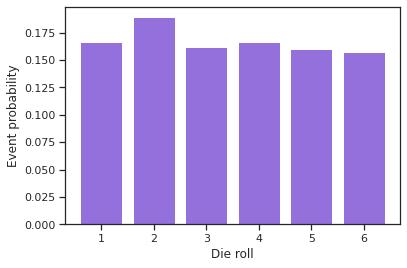

In [137]:
plt.bar(range(1, 7), event_proba, color='mediumpurple')
plt.xlabel('Die roll')
_ = plt.ylabel('Event probability')

As in the binomial case, multinomial distributions are created by sampling $n>1$ multinoulli distributions, where the multinoulli distribution is equivalent to the multinomial distribution when $n=1$: 

In [147]:
np.random.multinomial(1, [1/6.]*6)

array([0, 0, 0, 0, 0, 1])

Since multinomial distributions can represent any categorical variable (e.g., burger, hot dog, pizza; 52 playing cards; NFL teams), not just integer values, we can't always calculate an expected value.

### Poisson Distribution

**Poisson** is a third widely-used distribution for discrete random variables and it's the final distribution we'll cover.

It's named after French mathematician Simeon Denis Poisson and is used for count data, e.g.: 

* Number of cars that drive by in a minute
* Number of guests at restaurant in an evening
* Number of new hires in a month

First argument to NumPy `poisson()` method is $\lambda$, which must be greater than zero and guides peak of probability distribution. E.g., sampling from Poisson with $\lambda=5$ will tend to draw samples near 5.

In [148]:
lam=5

Second argument is number of samples to draw: 

In [149]:
n=1000

In [150]:
samples = np.random.poisson(lam, n) 

In [151]:
samples[0:20]

array([2, 6, 3, 3, 8, 4, 2, 7, 7, 5, 7, 5, 4, 8, 6, 3, 6, 8, 5, 7])

In [152]:
x, x_count = np.unique(samples, return_counts=True)

In [153]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [154]:
x_count

array([  5,  32,  85, 123, 165, 172, 154, 120,  89,  30,  14,   8,   1,
         2])

In [155]:
Px = x_count/n

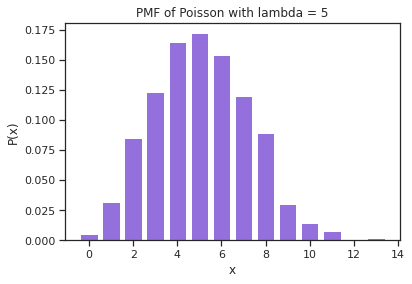

In [156]:
plt.bar(x, Px, color='mediumpurple')
plt.title('PMF of Poisson with lambda = {}'.format(lam))
plt.xlabel('x')
_ = plt.ylabel('P(x)')

### Mixture Distributions

Adapted from [Stack Overflow post](https://stackoverflow.com/questions/47759577/creating-a-mixture-of-probability-distributions-for-sampling):

Multinomial distribution (driven by `np.random.choice()`) with probabilities set by `coefficients` array determines which of the three distributions to sample from.

<class 'builtin_function_or_method'>
<class 'builtin_function_or_method'>
<class 'builtin_function_or_method'>
[[-5.99274735  5.18042241  1.4544517 ]
 [-4.07416639  4.52344619  2.19608516]
 [-4.90884524  4.52828242  1.07690193]
 [-1.14341925  4.83883381  2.75689441]
 [-0.38331198  5.34440585  3.42618268]
 [-1.20804363  5.87725081  2.94057525]
 [-3.56393243  4.33842132  3.18778492]
 [-4.92499871  4.34021455  2.24381951]
 [-3.57791284  5.66256235  1.71131901]
 [-5.16769115  4.07938519  2.78680725]]


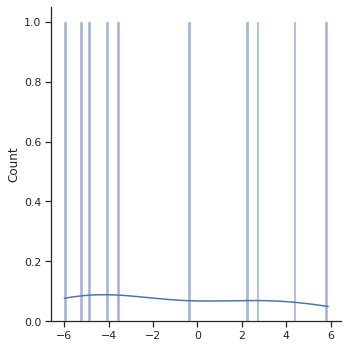

In [162]:
distributions = [
    {"type": np.random.normal, "kwargs": {"loc": -3, "scale": 2}},
    {"type": np.random.uniform, "kwargs": {"low": 4, "high": 6}},
    {"type": np.random.normal, "kwargs": {"loc": 2, "scale": 1}},
]

coefficients = np.array([0.5, 0.2, 0.3])
coefficients /= coefficients.sum()      # in case these did not add up to 1
sample_size = 10

num_distr = len(distributions)
data = np.zeros((sample_size, num_distr))
for idx, distr in enumerate(distributions):
    print(type(distr["type"]))
    data[:, idx] = distr["type"](size=(sample_size,), **distr["kwargs"])
print(data)

random_idx = np.random.choice(np.arange(num_distr), size=(sample_size,), p=coefficients)
sample = data[np.arange(sample_size), random_idx]
_ = sns.displot(sample, bins=100, kde=True)

**Gaussian mixture model** (GMM) is common type of mixture distribution, wherein all of the component distributions are normal.

**Return to slides here.**

## Segment 3: Information Theory

From the slides, the **self-information** formula is: 
$$ I(x)=-\text{log}P(x) $$

In [163]:
def self_info(my_p):
    return -1*np.log(my_p)

In [164]:
self_info(1)

-0.0

In [165]:
self_info(0.1)

2.3025850929940455

In [166]:
self_info(0.01)

4.605170185988091

In [167]:
self_info(0.5)

0.6931471805599453

In [168]:
self_info(0.5) + self_info(0.5)

1.3862943611198906

Depending on what logarithm base we use, the units of self-information vary. Most frequently, the units are either:

* **nats**: 
    * Natural logarithm, as above with `np.log()` 
    * Typical in ML
* **bits**: 
    * Base-2 logarithm
    * A.k.a. **shannons**
    * Typical in computer science

So, the self-information of $P(x) = 0.1$ is ~2.3 nats.

### Shannon and Differential Entropy

To quantify uncertainty about a probability distribution (as opposed to a single event), we can use **Shannon entropy**, which is denoted $H(x)$ or $H(P)$: 
$$ H(x) = \mathbb{E}_{\text{x}\sim P}[I(x)] \\
= -\mathbb{E}_{\text{x}\sim P}[\text{log}P(x)] $$

Conveys the expected informational content associated with an event drawn from the distribution:
* **Low entropy**: 
    * Distribution is ~deterministic and outcomes are ~certain
    * E.g., weighted coin always lands heads up ($P(1)=1$)
* **High entropy**: 
    * Outcomes are uncertain
    * Uniform distribution can be highest entropy
    * E.g., coin is as likely to be heads as tails ($P(0)=P(1)=0.5$)

As an example, Shannon entropy for a binary random variable (e.g., coin flip) is: 
$$ (p-1)\text{log}(1-p)-p \text{log}p $$

In [169]:
def binary_entropy(my_p):
    return (my_p-1)*np.log(1-my_p) - my_p*np.log(my_p)

Will throw `nan` with $p=0$ (always tails) or $p=1$ (always heads), but we can get close: 

In [170]:
binary_entropy(0.00001)

0.00012512920464949012

In [171]:
binary_entropy(0.99999)

0.00012512920464901166

In [172]:
binary_entropy(0.9)

0.3250829733914482

In [173]:
binary_entropy(0.5)

0.6931471805599453

In [174]:
p = np.linspace(0.001, 0.999, 1000) # start, finish, n points

In [175]:
H = binary_entropy(p)

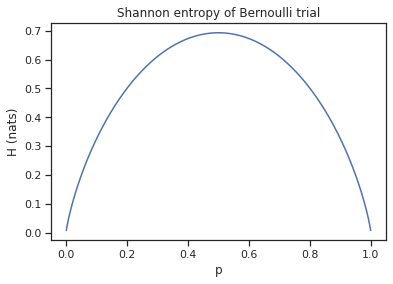

In [176]:
fig, ax = plt.subplots()
plt.title('Shannon entropy of Bernoulli trial')
plt.xlabel('p')
plt.ylabel('H (nats)')
_ = ax.plot(p,H)

**Differential entropy**: simply the term for Shannon entropy if distribution is PDF

### Kullback-Leibler Divergence

**KL divergence** enables us to quantify the relative Shannon (or differential) entropy of two probability distributions that are over the same random variable x.

For example, if we have one probability distribution described by $P(x)$ and another by $Q(x)$, their KL divergence (denoted $D_\text{KL}$) is: 
$$ D_\text{KL}(P||Q) = \mathbb{E}_{\text{x} \sim P}[\text{log}P(x) - \text{log}Q(x)] $$

### Cross-Entropy

Cross-entropy is a concept derived from KL divergence. Its detail is beyond the scope of this series except to mention that it provides us with the **cross-entropy cost** function. 

This cost function is ubiquitous in neural networks as it's the cost function of choice for predicting discrete, categorical outcomes. E.g., for a binary classifier, the cross-entropy cost ($C$) is: 

$$ C = -(y \cdot \text{log}(\hat{y}) + (1-y) \cdot \text{log}(1-\hat{y})) $$

In [177]:
def cross_entropy(y, a):
    return -1*(y*np.log(a) + (1-y)*np.log(1-a))

In [178]:
cross_entropy(1, 0.9997)

0.00030004500900199243

In [179]:
cross_entropy(1, 0.9)

0.10536051565782628

In [180]:
cross_entropy(1, 0.6)

0.5108256237659907

In [181]:
cross_entropy(1, 0.3)

1.2039728043259361